# Cálculo. Grado en ingeniería informática
# <pre>Control 2 ( octubre 2022)               Grupo: Cal. <pre> 

# Nombre y apellidos:                                                              

| Ejercicio  |     1    |     2    | 
|------------|:--------:|:--------:|
| Puntuación |  0.75    |   0.75   | 
| Evaluación |          |          |

### Al terminar la prueba, se debe descargar este fichero en formato .ipynb y enviarlo por correo electrónico a *jesus.cendan.verdes@udc.es*.  El nombre de este fichero debe empezar por vuestros apellidos seguidos del nombre y grupo de prácticas ApellidosNombre_cal00.ipynb.
## Todo fichero recibido que no tenga el formato requerido, .ipynb, o no sea legible no será evaluado, lo que significa que la nota de este control sea un 0.
### La resolución de los ejercicios es mediante jupyter-notebook. Se valorarán los comentarios incluidos en las respuestas

## Ejercicio 1 (0.75 puntos):
...

Piecewise((sqrt(x + 2), x < 0), (Abs(x) + sqrt(2), True))

EmptySet

Interval(-2, oo)

oo

0

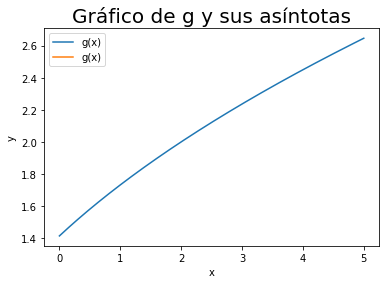

In [72]:
# Escribir código y comentarios necesarios
import sympy as sp

x, y = sp.symbols('x:y', real=True) # Primero definimos las dos varibales que vamos a emplear
g_expr = sp.Piecewise((sp.sqrt(x+2), x<0), (sp.Abs(x) + sp.sqrt(2), x>=0))# Acontinuación creamos la expresión de la que parte la función
g = sp.Lambda((x,y), g_expr) # Con "sp.Lambda" creamos la función a partir de la expresión creada previamente.
display(g(x, y)) # Comprobamos que esté bien.

display(sp.calculus.singularities(g, x, sp.Reals))      # Con la función "sp.calculus.singularities" calculamos las posibles singularidades de la función.                               
                                                        # En este caso como nos devuelve el conjunto vacío interpretamos que el dominio es el conjunto de todos los números reales.
I = sp.calculus.util.continuous_domain(g, x, sp.Reals)  # Con calculus.util.continuous_domain calculamos la continuidad de g(x).

display(I)               # Será continua entre 2 y + infinito.



#ASÍNTOTAS
# 1º Al ser el dominio todo R, no contamos con singularidades, por lo que no hay asíntotas verticales.

# 2º Pasaremos a calcular las asíntotas horizontales.

a_h = (sp.limit(sp.exp(x),x,-sp.oo))
display(sp.limit(sp.exp(x),x,sp.oo))
display(a_h)   # El resultado nos devuelve que en el - infinito la función tiende a 0 por lo que al cumplirse k=0, es decir, obtenemos un número real, podemos decir que cuando la función tiende a menos infinito existe el límite y es x=0.
               # En cambio en + infinito no hay asíntotas horizontales debido a que nos devuelve + infinito.

# 3º Como contamos con una asíntota horizontal, no hace falta calcular la oblícua.


import matplotlib as mp 
mp.__version__

import numpy as np
# Creación de los puntos donde se evalúa la función
x = np.linspace(0, 5, 400)

# Gráfica de g y cos(x), con una etiqueta para cada una
plt.plot(x, np.sqrt(x+2), np.sqrt(2), label='g(x)')


# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Añadir la leyenda (mostrando las etiquetas de los "plot")
plt.legend()


# Añadir un título al gráfico
plt.title('Gráfico de g y sus asíntotas', fontsize=20)
plt.show()




## Ejercicio 2 (0.75 puntos):
..

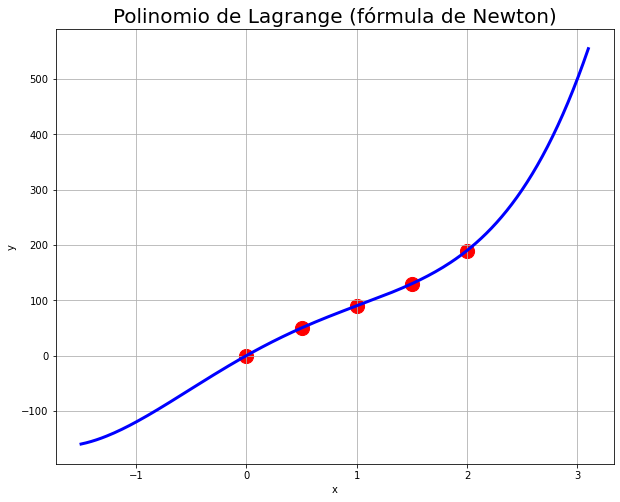

In [53]:
# Escribir código y comentarios necesarios
import numpy as np
import matplotlib.pyplot as plt

def newton_poly(coef, x_data, x):
    # evaluamos el polinomio de Lagrange, construido con la 
    # tabla de diferencias divididas, en el punto x
    # in: 
    #    coef ---> primera fila de la tabla de diferencias divididas
    #    x_data -> valores de x_i
    #    x ------> punto en el que queremos evaluar el polinomio 
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x_coef = [0, 0.5, 1, 1.5, 2.0]
y_coef = [0, 50, 90, 130, 190]

x= np.linspace(-1.5, 3.1, 200)

n = len(x_coef)
coef = np.zeros([n, n])
# La primera columna serán los datos en y
coef[:,0] = y_coef

# Necesitamos un doble bucle para crear la tabla de diferencias divididas
for j in range(1,n):
    for i in range(n-j):
        coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x_coef[i+j]-x_coef[i])

# evaluamos el polinomio según la function definida al principio
P_expr = newton_poly(coef[0,:],x_coef,x)

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_expr, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [75]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr = sp.cos(x)
f = sp.Lambda(x,f_expr)

N_max = 100
tol = 1.e-5
a = 1.25


x_aprox = np.zeros(N_max)

for k in range(0,N_max):
  x_aprox[k] = (a) / 2
  
  if f(x_aprox[k]) == 0: break
        
  if f(a) * f(x_aprox[k]) < 0:
     b = x_aprox[k]
  else:
     a = x_aprox[k]

  if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k+1) # Contamos 1 más porque empezamos el bucle en 0
print('Aproximación: ', x_aprox[k])
    

Número de iteraciones realizadas:  100
Aproximación:  9.860761315262648e-31
